# IE523: Financial Computing #
## &copy;  [Professor Ramavarapu "RS" Sreenivas](http://rsree.ise.illinois.edu) ##
### Industrial and Enterprise Systems Engineering, The Grainger College of Engineering,  UIUC ###

***

## The Repeated Squaring Algorithm ##

There are many applications where will have to deal with the problem of taking 
an square matrix <b>A</b> and raising it to a large exponent. That is, we will have to compute <b>A</b><sup>k</sup> for large values of $k$.   

You could compute it by multiplying <b>A</b> over with it self <i>k</i> times.   That is, do something along the lines of what is shown below
![Fig1](Figures/brute_force_exponent.pdf)
Assuming you are doing straightforward matrix multiplication, the above procedure will take <i>O(k x n<sup>3</sup>)</i>-steps, as each matrix multiplication takes <i>O(n<sup>3</sup>)</i>-steps and there are <i>k</i>-many of them. 

A candidate algorithm that is more efficient than the one shown above goes by the name of <i>Repeated Squaring</i>, and it described below.
![Fig2](Figures/repeated_squaring.pdf)
We have <i>log<sub>2</sub>k</i>-many regular multiplications to do, since $$\log_2{k} = \frac{\log_{10}{k}}
{\log_{10}{2}}$$ consequently this entire operation takes <i>O(b<sup>3</sup> x log<sub>2</sub>k)</i>-steps. This is illustrated by the code shown below.
***


In [1]:
# Illustration of the Repeated Squaring Algorithm
#
# IE523: Financial Computing
# Prof. R.S. Sreenivas
#

import numpy as np 
import time
import math
import matplotlib.pyplot as plt

In [2]:
def repeated_squaring(A, exponent) :
    if (exponent == 1) :
        return A
    else :
        if (exponent%2 == 1) :
            return (A * repeated_squaring(A*A, int((exponent-1)/2)))
        else :
            return (repeated_squaring(A*A, int(exponent/2)))

In [3]:
def regular_multiply(A, n) :
    if (n == 1) :
        return A
    else :
        return A*regular_multiply(A, n-1)

***
The function <tt>generate_a_row_of_a_stochastic_matrix(n)</tt> generates <tt>n</tt>-long row of non-negative numbers that add to 1.  The function <tt>generate_a_stochastic_matrix(n)</tt> generates <tt>n</tt>-many such rows to form a square matrix (that will be raised to a large exponent later on).  If <b>A</b> has entries that are greater than unity, and we raise <b>A</b> to a large exponent, we will have to deal with very very very large numbers.  This is why we have to do whatever we are doing in the next two functions below. 
***

In [4]:
def generate_a_row_of_a_stochastic_matrix(n) :
    x = []
    for i in range(n-1) :
        x.extend([np.random.uniform()])
    x = np.sort(x)

    y = [x[0]]
    for i in range(1,n-1) :
        y.extend([x[i]-x[i-1]])
    y.extend([1.0-x[n-2]])
    return y

In [5]:
def generate_a_stochastic_matrix(n) :
    probability_matrix = [[None for x in range(n)] for y in range(n)]
    for i in range(n) :
        probability_matrix[i] = generate_a_row_of_a_stochastic_matrix(n)
    return probability_matrix

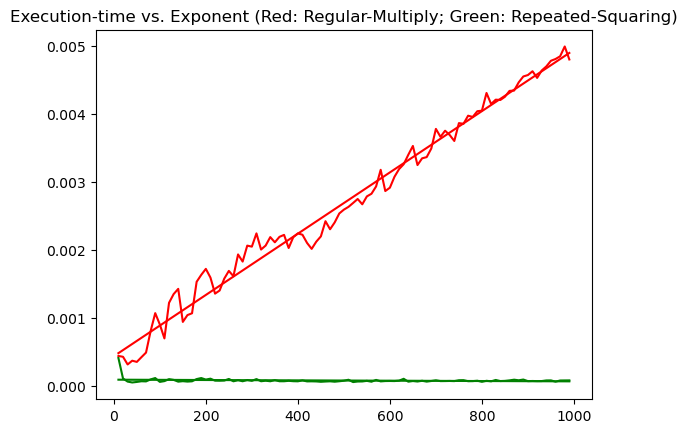

In [6]:
matrix_dimension = 20
A = np.matrix(generate_a_stochastic_matrix(matrix_dimension))
reg_multiply_run_time = []
repeated_squaring_run_time = []

for exponent in range(10,1000,10) :
    t0 = time.time()
    B = regular_multiply(A, exponent)
    t1 = time.time()
    reg_multiply_run_time.extend([t1-t0])
    
    t2 = time.time()
    C = repeated_squaring(A, exponent)
    t3 = time.time()
    repeated_squaring_run_time.extend([t3-t2])
    
    if (np.allclose(B, C) == False) :
        print ("Something went wrong for exponent = ", exponent)
        exit()


# linear fit 
#t = np.arange(100, 4000, 100)
t = range(10,1000,10)
z1 = np.polyfit(t, reg_multiply_run_time, 1)
p1 = np.poly1d(z1)
z2 = np.polyfit(t, repeated_squaring_run_time, 1)
p2 = np.poly1d(z2)
        
plt.plot(t, reg_multiply_run_time, 'r', t, repeated_squaring_run_time, 'g', t, p1(t), 'r-', t, p2(t), 'g-')
plt.title("Execution-time vs. Exponent (Red: Regular-Multiply; Green: Repeated-Squaring)") 
plt.show()